In [1]:
# from __future__ import print_function, division

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1

In [8]:
def integrate(y, dx):
    """
    Takes an array of y-values and a step size dx of the corresponding x values 
    and numerically integrates the function, returning the final value
    """
    counter = 0
    for yi in y:
        counter += dx * yi
    return counter

In [9]:
def plot_fn(xarr, yarr, title=''):
    """
    Basic plotting function
    """
    plt.plot(xarr, yarr)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

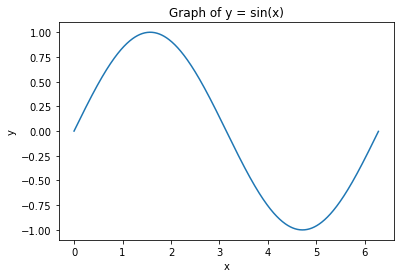

In [10]:
# TODO write code here to setup arrays x and y = sin(x) and then plot them by calling plot_fn
x = np.arange(0,2*np.pi,0.01)
y = np.sin(x)
plot_fn(x,y,'Graph of y = sin(x)')

In [15]:
# TODO then integrate y 
print("Integration with dx = 0.1:", integrate(y,0.1))
print("Integration with dx = 0.05:", integrate(y,0.05))
print("Integration with dx = 0.01:", integrate(y,0.01))

Integration with dx = 0.1: -0.00010853464617609568
Integration with dx = 0.05: -5.426732308804784e-05
Integration with dx = 0.01: -1.0853464615831085e-05


In [18]:
# TODO now use a np function to integrate y and compare
np.trapz(y,dx=0.01)

5.073044348824496e-06

In [50]:
# TODO find local maxima and minima of sinx from 0 to 6*pi
x = np.arange(0,6*np.pi,0.01)
y = np.sin(x)


In [51]:
import numpy.ma as ma

slope = 100*np.diff(y)
slope = np.append(slope,slope[-1])

sign = np.sign(slope)

sign_change = np.diff(sign)
sign_change = np.append(sign_change,0)


[False False False ... False False False]
[0.000e+00 1.000e-02 2.000e-02 ... 1.882e+01 1.883e+01 1.884e+01]


In [52]:
maxima = x[sign_change < 0]
minima = x[sign_change > 0]

print("Maxima are at x =", maxima)
print("Minima are at x =", minima)

Maxima are at x = [ 1.56  7.84 14.13]
Minima are at x = [ 4.7  10.99 17.27]


# Part 2

In [72]:
def wave_packet(x, k, sigma):
    """
    This function creates a wavepacket on the interval defined by x with
    wavevector k and standard deviation sigma.
    """
    return np.sin(k*x) *  np.exp(-(x**2)/(2*sigma**2))

In [73]:
def noisy_packet(x_values, k, sigma, noise_amplitude):
    """
    This function returns a noisy Gaussian wavepacket with wave
    vector k, standard deviation sigma and Gaussian noise of standard
    deviation noise_amplitude.
    """
    clean_y = wavepacket(x_values,k,sigma)
    noisy_y = clean_y + noise_amplitude*np.random.randn(len(x_values))
    return noisy_y

In [78]:
def clean_data(x_values,y_values):
    """
    This function should take a set of y_values, perform the Fourier
    transform on it, filter out the high frequency noise, transform the
    signal back into real space, and return it.
    """

    # Fourier Transform data
    y_fft = np.fft.rfft(y_values)
    
    # Build low pass filter
    low_pass_filter = np.ones(y_fft.shape)
    num_freq = y_fft.size
    low_pass_filter[int(num_freq/25):num_freq] = 0
    
    # Filter out high frequencies
    y_fft = low_pass_filter*y_fft
    y_clean_values = np.fft.irfft(y_fft,len(y_values))
    
    return y_clean_values

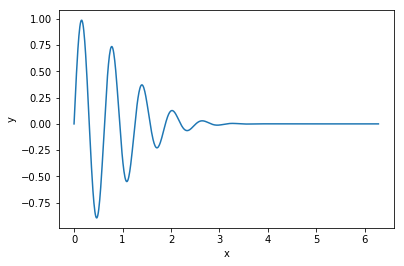

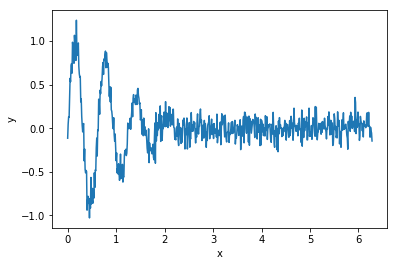

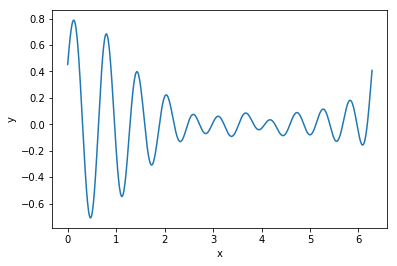

In [79]:
# TODO call noisy_packet() to get a Gaussian wave packet, 
# call clean_data() to apply a low pass filter to the data, and
# finally plot the result using plot_fn

x = np.arange(0,2*np.pi,0.01)
y = wave_packet(x,10,1)
plot_fn(x,y)

y = noisy_packet(x,10,1,0.1)
plot_fn(x,y)

y = clean_data(x,y)
plot_fn(x,y)

# Part 3

In [15]:
# TODO mask the arrays, then plot

In [16]:
# TODO try to generate masked noisy data and then clean it